# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('data/mini.csv')

In [7]:
data.head()

user_id  subscription_duration  recent_login_time  average_login_time  \
0  b919c29d                     13                 14           14.946163   
1  a0a60abb                     16                 18           18.453224   
2  b9f171ae                     22                  1           16.195228   
3  5dc0ba8b                      1                 19           17.628656   
4  65c83654                      4                  5           21.390656   

   average_time_per_learning_session  monthly_active_learning_days  \
0                           8.427187                            18   
1                          72.646087                            16   
2                          21.774492                            13   
3                          42.659066                            19   
4                          30.744287                            19   

   total_completed_courses  recent_learning_achievement  \
0                       16                    68.360455   
1                       13                    97.567322   
2                       14                    94.358763   
3                       18                    70.153228   
4                       10                    81.917908   

   abandoned_learning_sessions  community_engagement_level  \
0                            3                           4   
1                            2                           3   
2                            3                           4   
3                            0                           3   
4                            2                           4   

  preferred_difficulty_level subscription_type  customer_inquiry_history  \
0                        Low             Basic                         4   
1                     Medium             Basic                         1   
2                     Medium           Premium                         0   
3                        Low             Basic                         1   
4                     Medium             Basic                         3   

   payment_pattern  target  
0                5       0  
1                6       1  
2                7       1  
3                0       1  
4                0       1

In [9]:
data.tail()

user_id  subscription_duration  recent_login_time  average_login_time  \
9995  ae6b76bc                     22                 29           14.727623   
9996  24588752                     10                 11           19.374054   
9997  e4622a54                      7                 27           18.240978   
9998  e07fbad9                     11                  7           18.783800   
9999  e12dcb55                     10                  5           13.073230   

      average_time_per_learning_session  monthly_active_learning_days  \
9995                          84.053558                            18   
9996                          45.464833                             9   
9997                         127.302411                            24   
9998                           5.297234                            10   
9999                          28.120031                             3   

      total_completed_courses  recent_learning_achievement  \
9995                       16                    64.966803   
9996                        8                    82.750244   
9997                       14                    81.567839   
9998                       10                    89.885656   
9999                       13                    64.811297   

      abandoned_learning_sessions  community_engagement_level  \
9995                            2                           5   
9996                            3                           3   
9997                            3                           5   
9998                            4                           5   
9999                            4                           5   

     preferred_difficulty_level subscription_type  customer_inquiry_history  \
9995                        Low           Premium                         1   
9996                     Medium             Basic                         2   
9997                       High             Basic                         1   
9998                        Low             Basic                         2   
9999                        Low           Premium                         0   

      payment_pattern  target  
9995                1       1  
9996                7       1  
9997                6       1  
9998                0       1  
9999                3       0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [19]:
data.target.value_counts()

target
1    6199
0    3801
Name: count, dtype: int64

In [363]:
digital_data = data[['subscription_duration', 'recent_login_time', 'average_login_time','average_time_per_learning_session', 'monthly_active_learning_days',
                'total_completed_courses', 'recent_learning_achievement', 'abandoned_learning_sessions','community_engagement_level', 'customer_inquiry_history']]

digital_data.describe() 

subscription_duration  recent_login_time  average_login_time  \
count           10000.000000       10000.000000        10000.000000   
mean               11.897400          15.013200           14.994076   
std                 6.600896           8.362573            3.001869   
min                 1.000000           1.000000            2.366189   
25%                 6.000000           8.000000           13.025597   
50%                12.000000          15.000000           14.979228   
75%                18.000000          22.000000           16.995340   
max                23.000000          29.000000           26.998490   

       average_time_per_learning_session  monthly_active_learning_days  \
count                       10000.000000                  10000.000000   
mean                           54.917720                     12.545400   
std                            56.024310                      6.932239   
min                             0.011515                      1.000000   
25%                            15.276611                      7.000000   
50%                            37.578818                     13.000000   
75%                            75.584200                     19.000000   
max                           503.372616                     24.000000   

       total_completed_courses  recent_learning_achievement  \
count             10000.000000                 10000.000000   
mean                 12.227500                    75.029513   
std                   3.634125                     9.968529   
min                   1.000000                    35.941755   
25%                  10.000000                    68.278054   
50%                  12.000000                    75.126061   
75%                  15.000000                    81.718976   
max                  27.000000                   112.643828   

       abandoned_learning_sessions  community_engagement_level  \
count                 10000.000000                10000.000000   
mean                      3.043600                    3.886100   
std                       1.755052                    1.262175   
min                       0.000000                    1.000000   
25%                       2.000000                    3.000000   
50%                       3.000000                    4.000000   
75%                       4.000000                    5.000000   
max                      12.000000                    5.000000   

       customer_inquiry_history  
count              10000.000000  
mean                   2.010500  
std                    1.420983  
min                    0.000000  
25%                    1.000000  
50%                    2.000000  
75%                    3.000000  
max                   10.000000

In [41]:
print(data.preferred_difficulty_level.value_counts())
print('\n')
print(data.subscription_type.value_counts())
print('\n')
print(data.payment_pattern.value_counts())

preferred_difficulty_level
Low       4992
Medium    3008
High      2000
Name: count, dtype: int64


subscription_type
Basic      5979
Premium    4021
Name: count, dtype: int64


payment_pattern
1    1285
7    1284
0    1275
6    1268
5    1238
3    1230
4    1214
2    1206
Name: count, dtype: int64


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px

In [63]:
df_target = data.groupby('target').count()
df_target

user_id  subscription_duration  recent_login_time  average_login_time  \
target                                                                          
0          3801                   3801               3801                3801   
1          6199                   6199               6199                6199   

        average_time_per_learning_session  monthly_active_learning_days  \
target                                                                    
0                                    3801                          3801   
1                                    6199                          6199   

        total_completed_courses  recent_learning_achievement  \
target                                                         
0                          3801                         3801   
1                          6199                         6199   

        abandoned_learning_sessions  community_engagement_level  \
target                                                            
0                              3801                        3801   
1                              6199                        6199   

        preferred_difficulty_level  subscription_type  \
target                                                  
0                             3801               3801   
1                             6199               6199   

        customer_inquiry_history  payment_pattern  
target                                             
0                           3801             3801  
1                           6199             6199

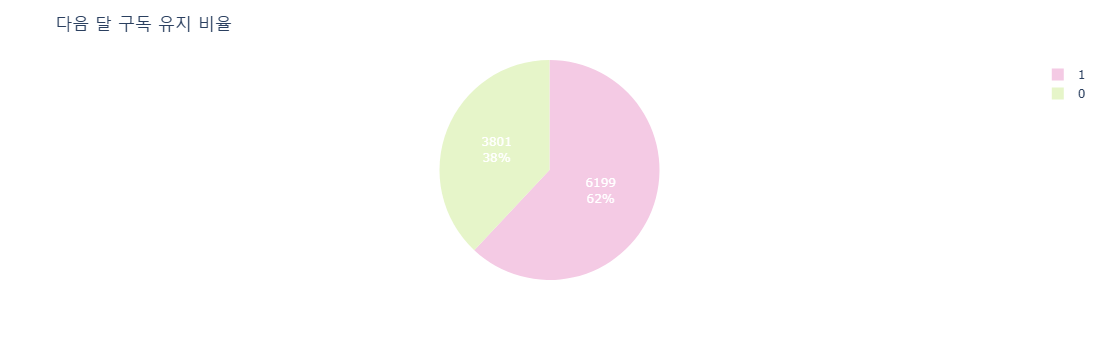

In [245]:
fig = px.pie(df_target, values='user_id', names = df_target.index, color_discrete_sequence =  px.colors.qualitative.Pastel2[3:5])
fig.update_traces(textposition='auto', textinfo='percent+value', textfont_size=12, textfont_color='white')
fig.update_layout(showlegend = True, title_text = '다음 달 구독 유지 비율')
fig.show()

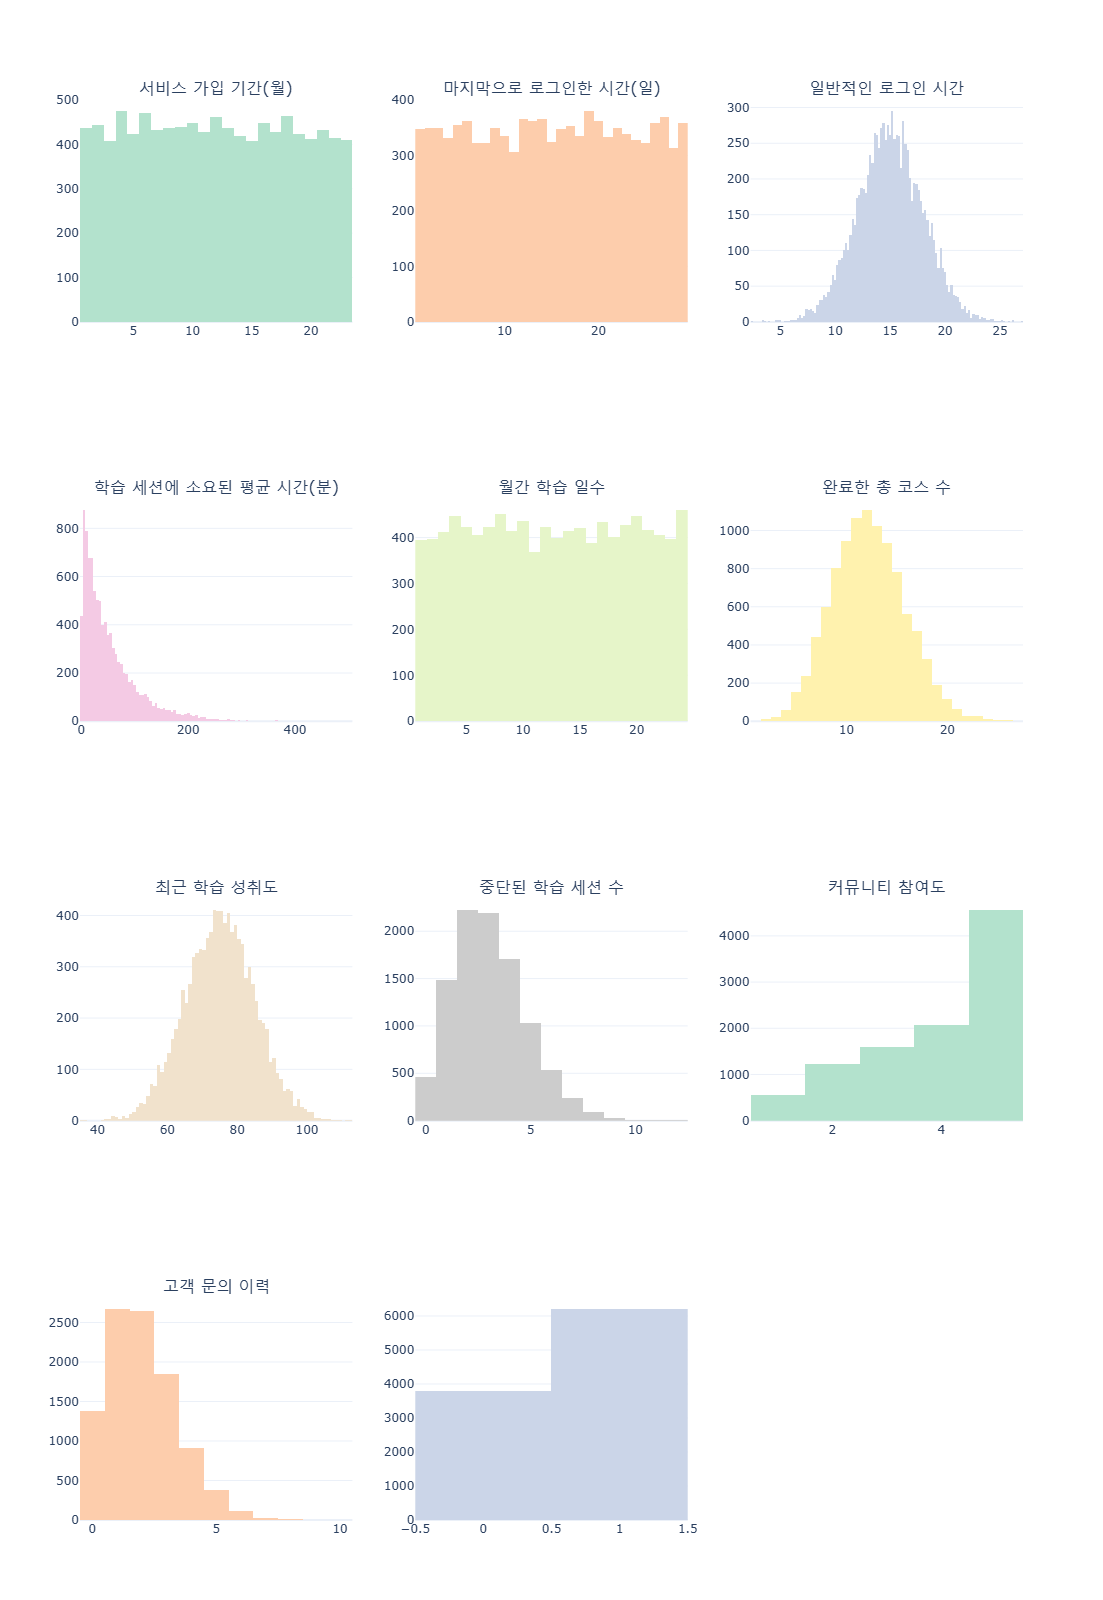

In [369]:
digital_data = data[['subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level','customer_inquiry_history','target']]

fig = make_subplots(rows = 4, cols = 3, 
                    subplot_titles = ("서비스 가입 기간(월)", "마지막으로 로그인한 시간(일)",
                                      "일반적인 로그인 시간", "학습 세션에 소요된 평균 시간(분)",
                                      "월간 학습 일수", "완료한 총 코스 수",
                                      "최근 학습 성취도", "중단된 학습 세션 수",
                                      "커뮤니티 참여도", "고객 문의 이력"))

colors = px.colors.qualitative.Pastel2

for i, col in enumerate(digital_data.columns):
    histogram = go.Histogram(
        x = digital_data[col],
        marker=dict(color=colors[i % len(colors)]))
    fig.add_trace(histogram, 
                  row = i // 3 + 1, 
                  col = i % 3 + 1)
    


fig.update_layout(height = 1600,
                  showlegend = False,
                  template = 'plotly_white')

fig.show()


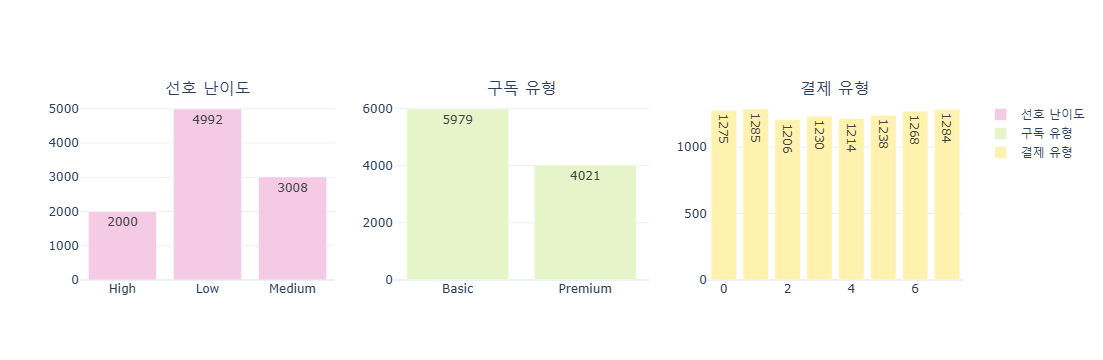

In [213]:
df1 = data.groupby('preferred_difficulty_level').count()
df2 = data.groupby('subscription_type').count()
df3 = data.groupby('payment_pattern').count()

dfs = [df1, df2, df3]
titles = ["선호 난이도", "구독 유형", "결제 유형"]
colors = px.colors.qualitative.Pastel2

fig = make_subplots(rows=1, cols=3, subplot_titles=titles)

for i, df in enumerate(dfs):
    fig.add_trace(
        go.Bar(
            x=df.index,
            y=df['user_id'],
            name=titles[i],
            text=df['user_id'], textposition='auto',
            marker_color=colors[i+3],
        ),
        row=1,
        col=i+1
    )

fig.update_traces(
    textfont_size=12,
    textposition="auto"
)

fig.update_layout(showlegend=True, template='plotly_white')
fig.update_layout(template='plotly_dark')

fig.show()

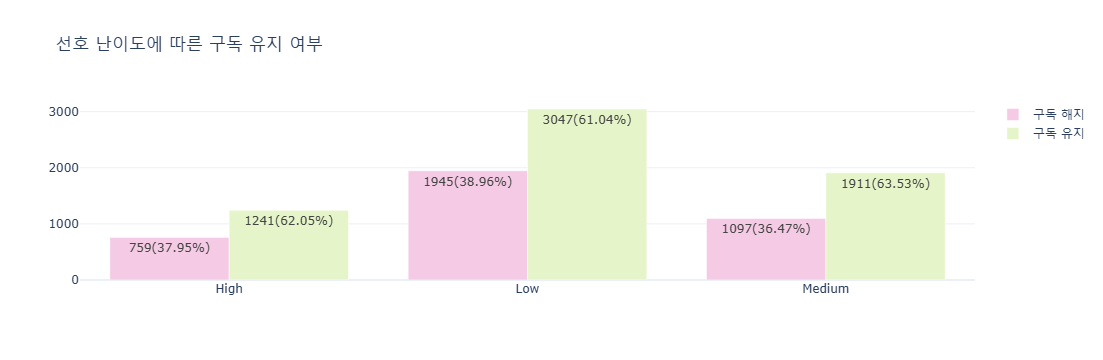

In [229]:
colors = px.colors.qualitative.Pastel2

df1_target_0 = data[data['target'] == 0].groupby('preferred_difficulty_level').count()
df1_target_1 = data[data['target'] == 1].groupby('preferred_difficulty_level').count()


df_total = df1_target_0['user_id'] + df1_target_1['user_id']

dfs = [df1_target_0, df1_target_1]
names = ['구독 해지', '구독 유지']

for df in dfs:
    df['percentage'] = (df['user_id'] / df_total) * 100


fig = go.Figure()

for i, df in enumerate(dfs):
    fig.add_trace(
        go.Bar(
            x = df.index,
            y = df['user_id'],
            name = names[i],
            text = [f"{u}({p:.2f}%)" for p, u in zip(df['percentage'], df['user_id'])],
            textposition = 'auto',
            marker_color=colors[i+3]
        )
    )

fig.update_traces(
    textfont_size = 12,
    textposition = "auto"
)

fig.update_layout(
    barmode = 'group',
    showlegend = True,
    title_text = "선호 난이도에 따른 구독 유지 여부",
    template = 'plotly_white'
)

fig.show()


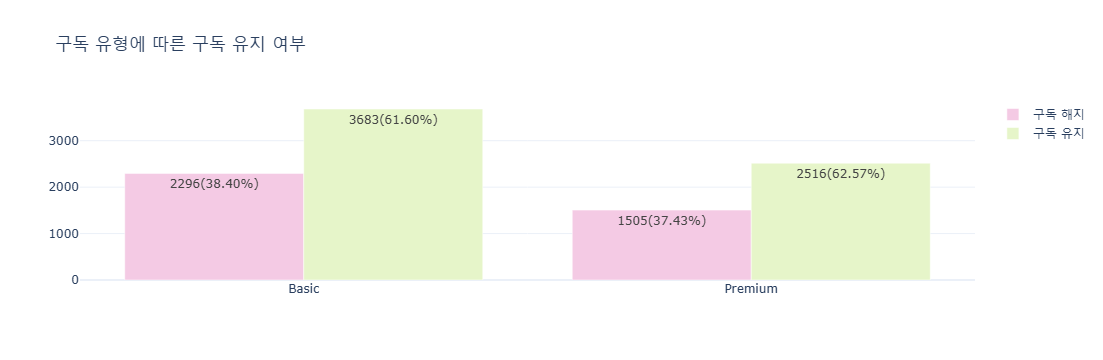

In [227]:
#구독 유형에 따른 구독 유지 여분
colors = px.colors.qualitative.Pastel2

df2_target_0 = data[data['target'] == 0].groupby('subscription_type').count()
df2_target_1 = data[data['target'] == 1].groupby('subscription_type').count()

df_total = df2_target_0['user_id'] + df2_target_1['user_id']

dfs = [df2_target_0, df2_target_1]
names = ['구독 해지', '구독 유지']

for df in dfs:
    df['percentage'] = (df['user_id'] / df_total) * 100

fig = go.Figure()

for i, df in enumerate(dfs):
    fig.add_trace(
        go.Bar(
            x = df.index,
            y = df['user_id'],
            name = names[i],
            text = [f"{u}({p:.2f}%)" for p, u in zip(df['percentage'], df['user_id'])],
            textposition = 'auto',
            marker_color=colors[i+3]
        )
    )

fig.update_traces(
    textfont_size = 12,
    textposition = "auto"
)

fig.update_layout(
    barmode = 'group',
    showlegend = True,
    title_text = "구독 유형에 따른 구독 유지 여부",
    template = 'plotly_white'
)

fig.show()

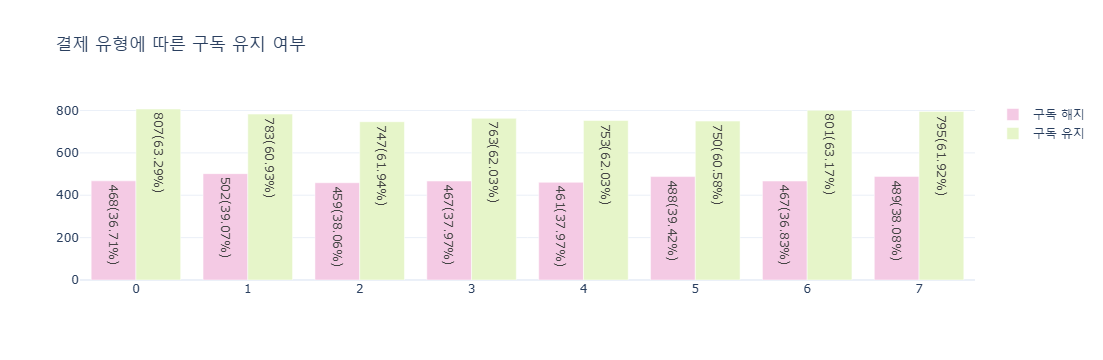

In [235]:
# 결제 유형에 따른 구독 유지 여부
colors = px.colors.qualitative.Pastel2

df3_target0 = data[data['target']==0].groupby('payment_pattern').count()
df3_target1 = data[data['target']==1].groupby('payment_pattern').count()

df_total = df3_target0['user_id'] + df3_target1['user_id']

dfs = [df3_target0, df3_target1]
names = ['구독 해지', '구독 유지']

for df in dfs:
    df['percentage'] = (df['user_id'] / df_total) * 100

fig = go.Figure()

for i, df in enumerate(dfs):
    fig.add_trace(
        go.Bar(
            x = df.index,
            y = df['user_id'],
            name = names[i],
            text = [f'{u}({p:.2f}%)' for p, u in zip(df['percentage'],df['user_id'])],
            textposition = 'auto',
            marker_color = colors[i+3]
        )
    )
            
fig.update_traces(
    textfont_size = 12,
    textposition = "auto"
)

fig.update_layout(
    barmode = 'group',
    showlegend = True,
    title_text = "결제 유형에 따른 구독 유지 여부",
    template = 'plotly_white'
)

fig.show()

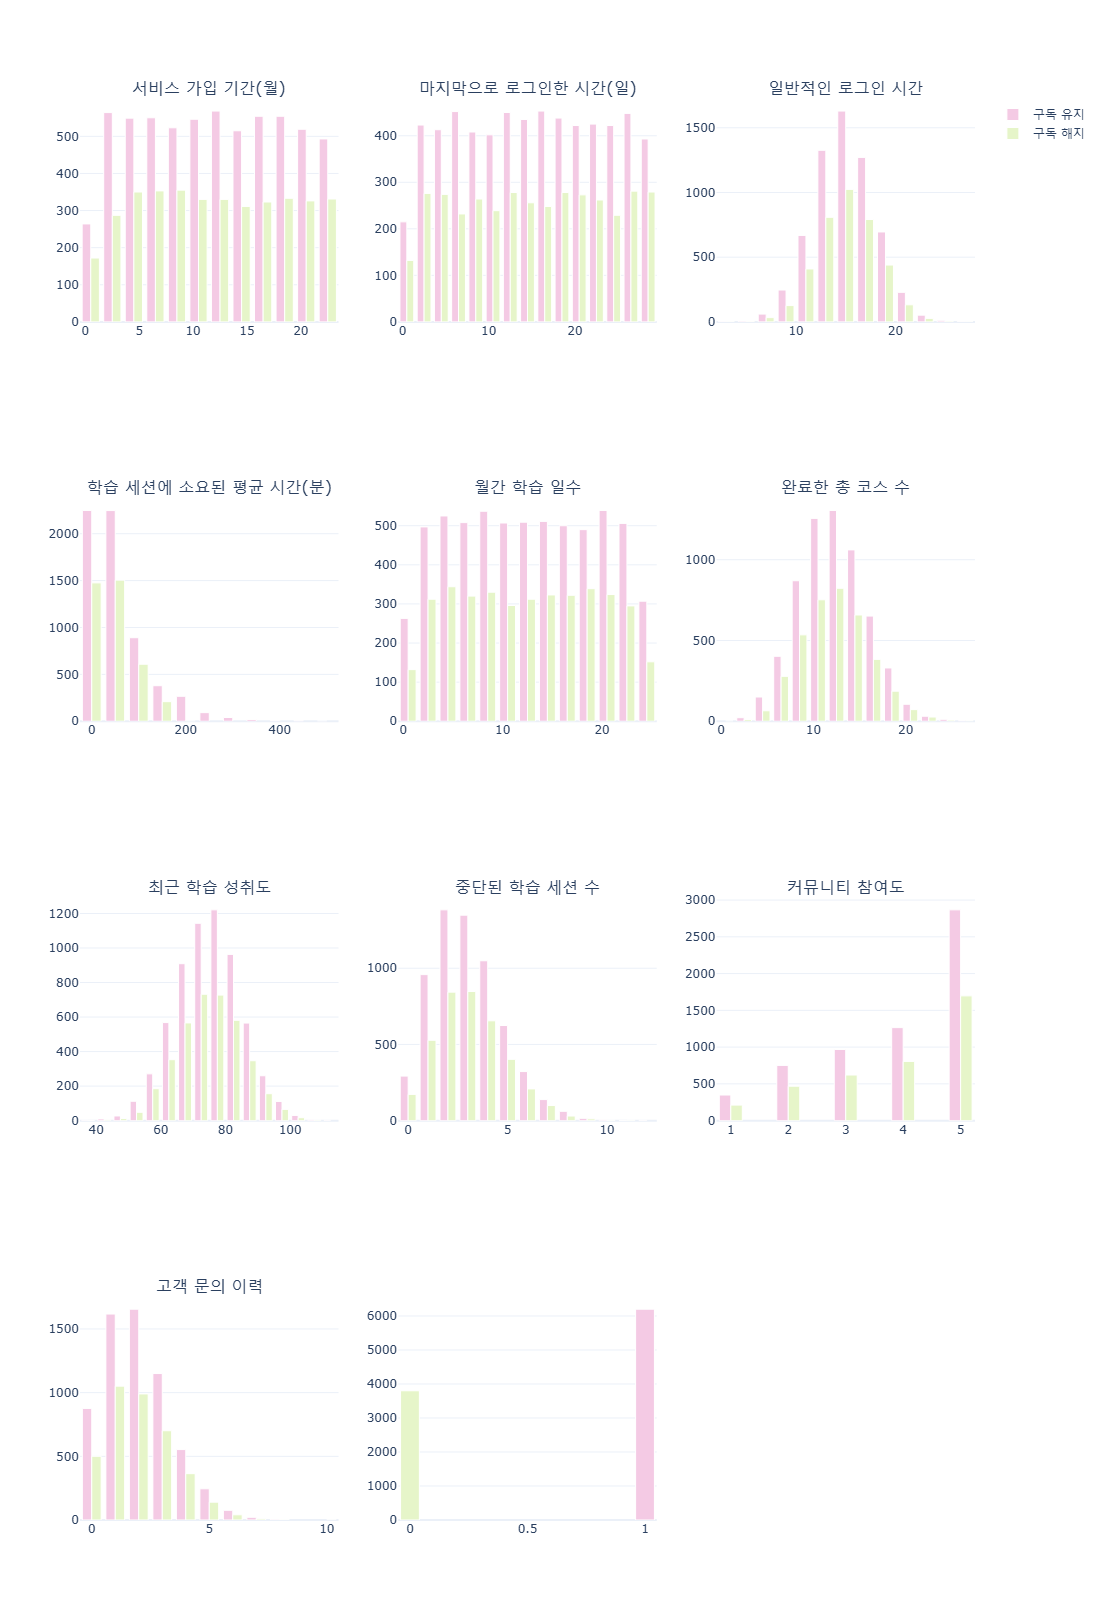

In [445]:
fig = make_subplots(rows = 4, cols = 3, 
                    subplot_titles = ("서비스 가입 기간(월)", "마지막으로 로그인한 시간(일)",
                                      "일반적인 로그인 시간", "학습 세션에 소요된 평균 시간(분)",
                                      "월간 학습 일수", "완료한 총 코스 수",
                                      "최근 학습 성취도", "중단된 학습 세션 수",
                                      "커뮤니티 참여도", "고객 문의 이력"))
names = ['구독 해지', '구독 유지']
colors = {'구독 유지': px.colors.qualitative.Pastel2[3], '구독 해지': px.colors.qualitative.Pastel2[4]}

for i, col in enumerate(digital_data.columns):
    histogram_1 = go.Histogram(x = digital_data[digital_data['target'] == 1][col], 
                               name = names[1],
                               nbinsx = 20,
                               marker=dict(color=colors['구독 유지']),
                               showlegend=True if i == 0 else False 
                               )

    fig.add_trace(histogram_1,
                  row = i // 3 + 1,
                  col = i % 3 + 1)

for i, col in enumerate(digital_data.columns):
    histogram_0 = go.Histogram(x = digital_data[digital_data['target'] == 0][col], 
                               name = names[0],
                               nbinsx = 20,
                               marker=dict(color=colors['구독 해지']),
                               showlegend=True if i == 0 else False
                               )
    
    fig.add_trace(histogram_0,
                  row = i // 3 + 1,
                  col = i % 3 + 1)

# 레이아웃 업데이트
fig.update_layout(height = 1600,
                  showlegend = True,
                  template = 'plotly_white'
                 )
fig.update_traces(marker_line_color = 'white', marker_line_width = 1)

# 그래프 표시
fig.show()


In [423]:
go.Histogram?

Init signature:
go.Histogram(
    arg=None,
    alignmentgroup=None,
    autobinx=None,
    autobiny=None,
    bingroup=None,
    cliponaxis=None,
    constraintext=None,
    cumulative=None,
    customdata=None,
    customdatasrc=None,
    error_x=None,
    error_y=None,
    histfunc=None,
    histnorm=None,
    hoverinfo=None,
    hoverinfosrc=None,
    hoverlabel=None,
    hovertemplate=None,
    hovertemplatesrc=None,
    hovertext=None,
    hovertextsrc=None,
    ids=None,
    idssrc=None,
    insidetextanchor=None,
    insidetextfont=None,
    legend=None,
    legendgroup=None,
    legendgrouptitle=None,
    legendrank=None,
    legendwidth=None,
    marker=None,
    meta=None,
    metasrc=None,
    name=None,
    nbinsx=None,
    nbinsy=None,
    offsetgroup=None,
    opacity=None,
    orientation=None,
    outsidetextfont=None,
    selected=None,
    selectedpoints=None,
    showlegend=None,
    stream=None,
    text=None,
    textangle=None,
    textfont=None,
    textposition